In [26]:
import numpy as np
import pandas as pd
import os

import preprocessing as pp
import model_gen as vae

from tensorflow import keras
from tensorflow.keras import layers

from matplotlib import pyplot as plt

In [17]:
time_step = 12

thresh_dir = 'deploy/'
model_dir = 'deploy/models_' + str(time_step) + '/'
data_path = '/Users/baconbaker/Documents/Studium/ANM/anm-project/data/test_data/host/'

In [27]:
def find_anom(host, dfs):
    dfs['db_oracle_11g'] = dfs.pop('db')
    dfs['dcos_container'] = dfs.pop('container')
    dfs['mw_redis'] = dfs.pop('redis')
    dfs['os_linux'] = dfs.pop('os')
    dfs['dcos_docker'] = dfs.pop('docker')
    
    problems = []
    key = ''
    for k in dfs:
        if host in dfs[k].cmdb_id.unique():
            key = k
    if key == '':
        print('Host not found!')
        return
    df = dfs[key]

    thresh = pd.read_csv(thresh_dir+'thresh_'+str(time_step)+'.csv')

    df_h = df[df.cmdb_id==host]
    for name in df_h['name'].unique():
        df_nh = df_h[df_h.name == name]

        #Pre-process data  
        x_test = pp.get_host_kpi_data(df_nh, time_step)
        print(key+'_'+name)
        if key+'_'+name in os.listdir(model_dir):
            print('-'*40)
            print("Running detection for ", host, name)
            if x_test == []:
                print(name, host, 'not enough data')
                continue

            model = keras.models.load_model(model_dir+key+'_'+name)
            x_test_pred = model.predict(x_test)
            test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
            test_mae_loss = test_mae_loss.reshape((-1))
            anomalies = np.greater(test_mae_loss, thresh[thresh.KPI==key+'_'+name]['thresh'].values[0])
            
            
            if True in anomalies:
                print('*'*40)
                print("Anomaly in ", host, name)
                plt.plot(x_test[0])
                plt.plot(model.predict(x_test)[0])
                plt.show()
                problems.append((host, name))
        else:
            print(name, host, ' model does not exist')
    if problems == []:
        print("No anomalies found in ", host)
    return problems

Saving os into dfs
Saving db into dfs
Saving redis into dfs
Saving container into dfs
Saving docker into dfs
Getting KPI x Host data
mw_redis_instantaneous_ops_per_sec
----------------------------------------
Running detection for  redis_004 instantaneous_ops_per_sec


<ipython-input-27-5dbcda61cba5>:30: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if x_test == []:


Getting KPI x Host data
mw_redis_instantaneous_input_kbps
----------------------------------------
Running detection for  redis_004 instantaneous_input_kbps


<ipython-input-27-5dbcda61cba5>:30: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if x_test == []:


Getting KPI x Host data
mw_redis_used_cpu_sys
----------------------------------------
Running detection for  redis_004 used_cpu_sys


<ipython-input-27-5dbcda61cba5>:30: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if x_test == []:


Getting KPI x Host data
mw_redis_used_memory
----------------------------------------
Running detection for  redis_004 used_memory


/Users/baconbaker/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
<ipython-input-27-5dbcda61cba5>:30: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if x_test == []:


Getting KPI x Host data
mw_redis_used_cpu_user
----------------------------------------
Running detection for  redis_004 used_cpu_user


<ipython-input-27-5dbcda61cba5>:30: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if x_test == []:


Getting KPI x Host data
mw_redis_Redis_key_count
----------------------------------------
Running detection for  redis_004 Redis_key_count


<ipython-input-27-5dbcda61cba5>:30: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if x_test == []:


Getting KPI x Host data
mw_redis_blocked_clients
----------------------------------------
Running detection for  redis_004 blocked_clients


<ipython-input-27-5dbcda61cba5>:30: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if x_test == []:


Getting KPI x Host data
mw_redis_keyspace_hits
----------------------------------------
Running detection for  redis_004 keyspace_hits


<ipython-input-27-5dbcda61cba5>:30: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if x_test == []:


****************************************
Anomaly in  redis_004 keyspace_hits


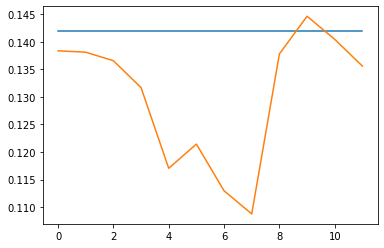

Getting KPI x Host data
mw_redis_keyspace_misses
----------------------------------------
Running detection for  redis_004 keyspace_misses


<ipython-input-27-5dbcda61cba5>:30: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if x_test == []:


Getting KPI x Host data
mw_redis_expired_keys
----------------------------------------
Running detection for  redis_004 expired_keys


<ipython-input-27-5dbcda61cba5>:30: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if x_test == []:


Getting KPI x Host data
mw_redis_total_connections_received
----------------------------------------
Running detection for  redis_004 total_connections_received


<ipython-input-27-5dbcda61cba5>:30: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if x_test == []:


****************************************
Anomaly in  redis_004 total_connections_received


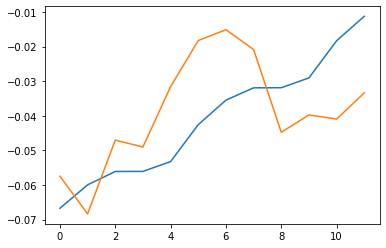

Getting KPI x Host data
mw_redis_rejected_connections
----------------------------------------
Running detection for  redis_004 rejected_connections


<ipython-input-27-5dbcda61cba5>:30: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if x_test == []:


Getting KPI x Host data
mw_redis_instantaneous_output_kbps
----------------------------------------
Running detection for  redis_004 instantaneous_output_kbps


<ipython-input-27-5dbcda61cba5>:30: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if x_test == []:


Getting KPI x Host data
mw_redis_connected_clients
----------------------------------------
Running detection for  redis_004 connected_clients


<ipython-input-27-5dbcda61cba5>:30: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if x_test == []:


****************************************
Anomaly in  redis_004 connected_clients


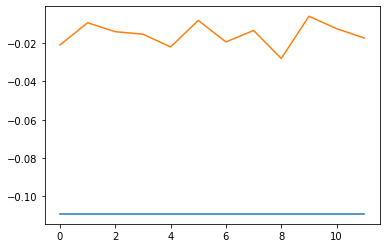

Getting KPI x Host data
mw_redis_used_memory_peak
----------------------------------------
Running detection for  redis_004 used_memory_peak


<ipython-input-27-5dbcda61cba5>:30: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if x_test == []:


Getting KPI x Host data
mw_redis_mem_fragmentation_ratio
----------------------------------------
Running detection for  redis_004 mem_fragmentation_ratio


/Users/baconbaker/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
<ipython-input-27-5dbcda61cba5>:30: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if x_test == []:


Getting KPI x Host data
mw_redis_total_commands_processed
----------------------------------------
Running detection for  redis_004 total_commands_processed


<ipython-input-27-5dbcda61cba5>:30: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if x_test == []:


Getting KPI x Host data
mw_redis_evicted_keys
----------------------------------------
Running detection for  redis_004 evicted_keys


<ipython-input-27-5dbcda61cba5>:30: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if x_test == []:


Getting KPI x Host data
mw_redis_redis_ping
----------------------------------------
Running detection for  redis_004 redis_ping


<ipython-input-27-5dbcda61cba5>:30: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if x_test == []:


Getting KPI x Host data
mw_redis_redis_load
----------------------------------------
Running detection for  redis_004 redis_load


<ipython-input-27-5dbcda61cba5>:30: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if x_test == []:


In [32]:
problems = find_anom('redis_004', pp.load_dfs(data_path))

In [25]:
problems

[('os_010', 'Memory_available'),
 ('os_010', 'Buffers_used'),
 ('os_010', 'Memory_used_pct'),
 ('os_010', 'Memory_available_pct')]